### Pandas - Reading in the data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
pd.__version__

'0.17.0'

In [3]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [4]:
path1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\titles.csv'
path2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\cast.csv'

titles = pd.DataFrame.from_csv(path1 , index_col=None)
cast = pd.DataFrame.from_csv(path2, index_col=None)

In [5]:
titles.head(3)

,title,year
0,Insane,2010
1,Dreamer,2011
2,Down in San Diego,1941


### Pandas - Using str functions within the dataframe

In [6]:
titles.head(3)

,title,year
0,Insane,2010
1,Dreamer,2011
2,Down in San Diego,1941


In [7]:
titles[titles.title == "Hamlet"].head(3)

,title,year
3129,Hamlet,2015
5483,Hamlet,2014
20319,Hamlet,2016


In [8]:
#use series.str
titles[titles.title.str.startswith("Ham")].head(3)

,title,year
1749,Ham meyva,1970
3129,Hamlet,2015
4512,Hamrahi,1974


### Pandas - Tabling, sorting, sorting by index

In [9]:
# aggregate values of one series with value_counts()

titles.year.value_counts().head(3)

2015    12571
2014     8353
2013     7730
Name: year, dtype: int64

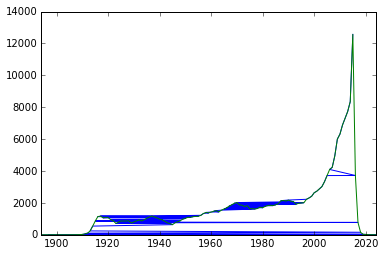

In [10]:
titles.year.value_counts().plot()

#problem - years right to left
#problem - output sorted by frequency, not years
# we want to sort the pandas index, not the data

titles.year.value_counts().sort_index().plot()

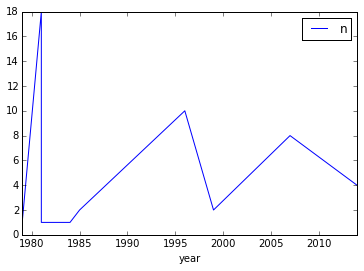

In [11]:
# Plot Kermit the frog's n status over the years
c = cast[cast.character == "Kermit the Frog"].sort_values('year')
c.plot(x='year' , y='n' , kind='line')

### Pandas - Selecting columns

In [12]:
c.head(3)[['year','n']] #select only some columns

,year,n
861584,1979,1
861570,1981,18
861576,1981,1


### What are the ten most common movie names of all time?

In [13]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  13
Macbeth                 12
The Three Musketeers    12
She                     11
The Outsider            11
Maya                    11
Blood Money             11
The Promise             10
Borderline              10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [14]:
t0 = titles[(titles.year >= 1930) & (titles.year < 1940)]

t0.year.value_counts().head(3)

1937    1180
1936    1117
1938    1115
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [15]:
titles['decade'] = titles.year // 10 * 10  #create a decade column in the titles dataframe

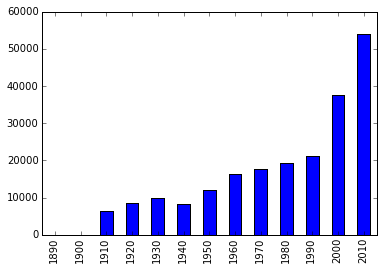

In [69]:
titles.decade[titles.decade < 2020].value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

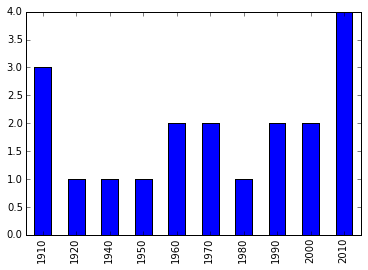

In [70]:
titles[titles.title == 'Hamlet'].decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [18]:
cast['decade'] = cast.year // 10 * 10 #create a decade column in the cast dataframe

In [19]:
cast[cast.character == "Rustler"].sort_values('year').tail(3)

,title,year,name,type,character,n,decade
1580532,Gunfighter,1999,Marcus Pinkney,actor,Rustler,31,1990
1702287,Jericho,2000,Eddie (V) Rodriguez,actor,Rustler,64,2000
1076307,Jericho,2000,Max Konz,actor,Rustler,63,2000


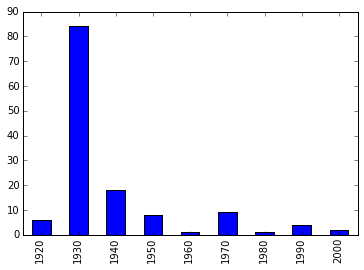

In [71]:
cast[cast.character == "Rustler"].decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Batman" characters each decade.

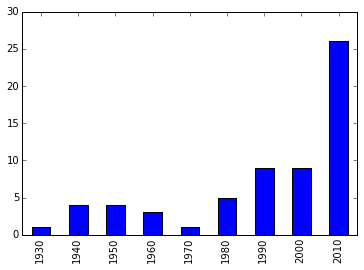

In [72]:
cast[cast.character == "Batman"].decade.value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [22]:
cast.character[cast.character != 'Himself'].value_counts().head(11)

Dancer         10909
Extra           8591
Reporter        7519
Doctor          6703
Policeman       6423
Student         6235
Nurse           6066
Bartender       6040
Minor Role      5675
Party Guest     5673
Zombie          5614
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [23]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Kareena Kapoor          5
Bunny Yeager            5
Chris Evert             5
Sally Jessy Raphael     5
Caroline Rhea           5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [24]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             92
Richard Nixon            38
Ronald Reagan            28
John F. Kennedy          26
Ron Jeremy               23
Winston Churchill        21
George W. Bush           20
Bill Clinton             20
Franklin D. Roosevelt    20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [73]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Edmund Cobb         24
Franklyn Farnum     24
Tom London          24
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [74]:
cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor    19
Mammootty        17
Sukumari         16
Lou Scheimer     15
Aruna Irani      14
Mohanlal         13
Rajesh Khanna    13
Raj Babbar       13
Deven Verma      13
Om Shivpuri      12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

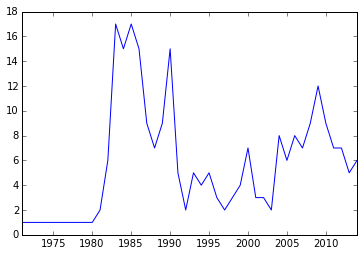

In [27]:
cast[(cast.name == "Mammootty") & (cast.year < 2015)].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [31]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [32]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Reporter         5
Science Club Member      5
Science Promo Cadet      4
Science Kid              4
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

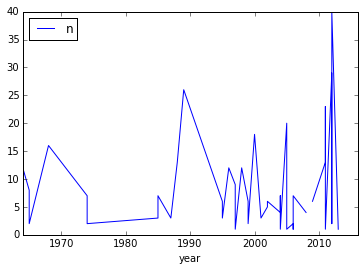

In [76]:
cast[cast.name == "Judi Dench"].sort_values('year').plot(x='year',y='n',kind='line')

### Plot the n-values of Cary Grant's roles through his career.

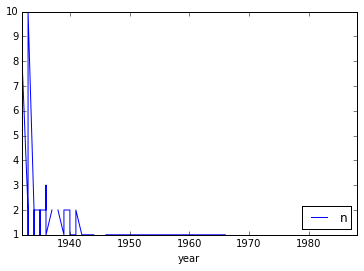

In [60]:
cast[cast.name == "Cary Grant"].sort_values('year').plot(x='year',y='n',kind='line')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

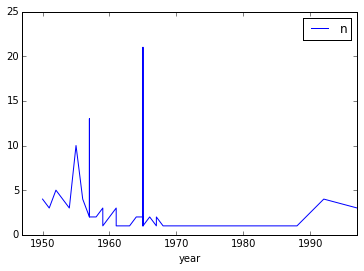

In [61]:
cast[cast.name == "Sidney Poitier"].sort_values('year').plot(x='year',y='n',kind='line')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [63]:
cast.head()

,title,year,name,type,character,n,decade
0,Suuri illusioni,1985,Homo $,actor,Guests,22,1980
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,2000
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27,1990
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3,2000
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,2010


In [65]:
len(cast[(cast.n == 1) & (cast.type == 'actor') & (cast.year >= 1950) & (cast.year < 1960)])

6358

In [66]:
len(cast[(cast.n == 1) & (cast.type == 'actress') & (cast.year >= 1950) & (cast.year < 1960)])

2801

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [67]:
len(cast[(cast.n == 2) & (cast.type == 'actor') & (cast.year >= 1950) & (cast.year < 1960)])

4370

In [68]:
len(cast[(cast.n == 2) & (cast.type == 'actress') & (cast.year >= 1950) & (cast.year < 1960)])

4381

### Extras

In [34]:
cast[cast.character == "Science Kid"].sort_values('year')

,title,year,name,type,character,n,decade
28515,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25,1980
1779244,All Kids Count,2011,Adrian Schemm,actor,Science Kid,NaN,2010
751716,Tomorrowland,2015,Glen (II) Gordon,actor,Science Kid,NaN,2010
2410501,Aria Appleton,2015,Sydney Cowand,actress,Science Kid,NaN,2010
